In [77]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/mucnihh/Income_Estimate.xlsx
/kaggle/input/mucnihh/credit_data.csv
/kaggle/input/mucnihh/Demographic Details.xlsx


**Load Credit Data**

In [78]:
credit_data = pd.read_csv('/kaggle/input/mucnihh/credit_data.csv', sep='|')
credit_data.head(10)

,ID,Loan_Type,Balance,Sanction_Amount,Credit_Limit,Date_Opened,Date_Closed,Installment_Amount,Past_Due_Amount,Repayment_Tenure,Terms_Frequency,Ownership_Type,Last_Payment_Amount,Last_Payment_Date,Credit_Score
0,100002,Personal Loan,0.0,200000.0,0.0,22/12/2017,30/12/2019,0.0,0.0,NaN,M,Individual,149946.0,30/12/2019,844.0
1,100002,Home Loan,0.0,900000.0,0.0,30/05/2018,11/05/2020,0.0,NaN,NaN,NaN,Joint,NaN,05/05/2020,844.0
2,100002,Home Loan,0.0,900000.0,0.0,30/05/2018,12/10/2020,0.0,NaN,NaN,NaN,Joint,NaN,05/10/2020,844.0
3,100002,Personal Loan,0.0,700000.0,0.0,06/02/2019,06/07/2021,0.0,0.0,63.0,M,Individual,15483.0,05/07/2021,844.0
4,100002,Credit Card,0.0,185123.0,0.0,28/11/2018,12/05/2021,0.0,0.0,NaN,M,Individual,NaN,30/04/2021,844.0
5,100002,Credit Card,0.0,225128.0,0.0,09/04/2012,31/07/2023,0.0,0.0,NaN,M,Individual,NaN,24/07/2023,844.0
6,100002,Personal Loan,0.0,1000000.0,0.0,20/12/2019,08/02/2023,0.0,0.0,63.0,M,Individual,21618.0,05/02/2023,844.0
7,100002,Credit Card,105255.0,199887.0,730000.0,11/02/2020,NaN,0.0,0.0,NaN,NaN,Individual,NaN,11/06/2024,844.0
8,100002,Credit Card,0.0,251824.0,279000.0,28/11/2018,04/02/2024,0.0,0.0,NaN,M,Individual,NaN,02/02/2024,844.0
9,100002,Credit Card,0.0,21976.0,20000.0,25/05/2010,30/09/2018,0.0,0.0,NaN,NaN,Individual,NaN,30/09/2018,844.0


In [79]:
credit_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 648985 entries, 0 to 648984
Data columns (total 15 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   ID                   648985 non-null  int64  
 1   Loan_Type            648985 non-null  object 
 2   Balance              648269 non-null  float64
 3   Sanction_Amount      648985 non-null  float64
 4   Credit_Limit         631465 non-null  float64
 5   Date_Opened          648417 non-null  object 
 6   Date_Closed          391193 non-null  object 
 7   Installment_Amount   648985 non-null  float64
 8   Past_Due_Amount      526742 non-null  float64
 9   Repayment_Tenure     205469 non-null  float64
 10  Terms_Frequency      320797 non-null  object 
 11  Ownership_Type       648985 non-null  object 
 12  Last_Payment_Amount  156539 non-null  float64
 13  Last_Payment_Date    528168 non-null  object 
 14  Credit_Score         648602 non-null  float64
dtypes: float64(8), in

In [80]:
null_percentage_per_feature = credit_data.isnull().mean() * 100

null_percentage_df = pd.DataFrame(null_percentage_per_feature, columns=['Null Percentage'])

null_percentage_df.reset_index(inplace=True)
null_percentage_df.rename(columns={'index': 'Feature'}, inplace=True)

print(null_percentage_df)

                Feature  Null Percentage
0                    ID         0.000000
1             Loan_Type         0.000000
2               Balance         0.110326
3       Sanction_Amount         0.000000
4          Credit_Limit         2.699600
5           Date_Opened         0.087521
6           Date_Closed        39.722336
7    Installment_Amount         0.000000
8       Past_Due_Amount        18.836029
9      Repayment_Tenure        68.339946
10      Terms_Frequency        50.569428
11       Ownership_Type         0.000000
12  Last_Payment_Amount        75.879412
13    Last_Payment_Date        18.616301
14         Credit_Score         0.059015


## Data Quality Chehcking and Fixing it

**Check Duplicate and Delete it**

In [81]:
print("Total duplicate rows:",credit_data.duplicated().sum())

Total duplicate rows: 6563


In [82]:
credit_data = credit_data.drop_duplicates()

**Dropping Null Balanced Data**

In [83]:
credit_data = credit_data.dropna(subset=['Balance'])

**Cleaning Past Due Amount Data**

In [84]:
credit_data["Past_Due_Amount"] = credit_data["Past_Due_Amount"].fillna(0.0)

**Cleaning Last amout Paid**

In [85]:
credit_data['Last_Payment_Amount'] = credit_data['Last_Payment_Amount'].fillna(0.0)

**Data Type Validation**

In [86]:
credit_data['Date_Closed'] = pd.to_datetime(credit_data['Date_Closed'], format='%d/%m/%Y')
credit_data['Date_Opened'] = pd.to_datetime(credit_data['Date_Opened'], format='%d/%m/%Y')
credit_data['Last_Payment_Date'] = pd.to_datetime(credit_data['Last_Payment_Date'], format='%d/%m/%Y')

In [87]:
credit_data['Loan_Type'] = credit_data['Loan_Type'].astype(str)
credit_data['Ownership_Type'] = credit_data['Ownership_Type'].astype(str)
credit_data['Terms_Frequency'] = credit_data['Terms_Frequency'].astype(str)

**Value Range Validation**

In [88]:
conditions = (credit_data[['Balance', 'Sanction_Amount', 'Credit_Limit', 
                            'Installment_Amount', 'Past_Due_Amount', 
                            'Repayment_Tenure', 'Last_Payment_Amount']] < 0)

credit_data = credit_data[~conditions.any(axis=1) & 
                                   credit_data['Credit_Score'].between(300, 900)]


**Date Consistency**

In [89]:
credit_data['Date_Opened'] = pd.to_datetime(credit_data['Date_Opened'], errors='coerce')
credit_data['Date_Closed'] = pd.to_datetime(credit_data['Date_Closed'], errors='coerce')

credit_data = credit_data[(credit_data['Date_Closed'].isna()) | (credit_data['Date_Closed'] >= credit_data['Date_Opened'])]


In [90]:
credit_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 627486 entries, 0 to 648983
Data columns (total 15 columns):
 #   Column               Non-Null Count   Dtype         
---  ------               --------------   -----         
 0   ID                   627486 non-null  int64         
 1   Loan_Type            627486 non-null  object        
 2   Balance              627486 non-null  float64       
 3   Sanction_Amount      627486 non-null  float64       
 4   Credit_Limit         611203 non-null  float64       
 5   Date_Opened          627253 non-null  datetime64[ns]
 6   Date_Closed          378631 non-null  datetime64[ns]
 7   Installment_Amount   627486 non-null  float64       
 8   Past_Due_Amount      627486 non-null  float64       
 9   Repayment_Tenure     202864 non-null  float64       
 10  Terms_Frequency      627486 non-null  object        
 11  Ownership_Type       627486 non-null  object        
 12  Last_Payment_Amount  627486 non-null  float64       
 13  Last_Payment_Date  

**Credit Limit Cleaning**

In [91]:
credit_data_sorted = credit_data.sort_values(by='Sanction_Amount', ascending=False)

credit_data_sorted['Max_Sanction_Amount'] = credit_data_sorted.groupby('ID')['Sanction_Amount'].transform('max')

credit_data_sorted['Credit_Limit'] = credit_data_sorted.apply(
    lambda row: row['Max_Sanction_Amount'] if pd.isnull(row['Credit_Limit']) else row['Credit_Limit'], axis=1
)

credit_data = credit_data_sorted.drop(columns=['Max_Sanction_Amount'])


**Drop Repayment_Tenure**

In [92]:
credit_data = credit_data.drop('Repayment_Tenure', axis=1)

In [93]:
credit_data.Loan_Type.unique()

array(['Other Loan', 'Business Loan', 'LAP', 'Home Loan', 'Credit Card',
       'Personal Loan', 'Vehicle Loan', 'Micro Finance Loan',
       'Education Loan', 'Gold Loan'], dtype=object)

In [94]:
credit_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 627486 entries, 303279 to 648983
Data columns (total 14 columns):
 #   Column               Non-Null Count   Dtype         
---  ------               --------------   -----         
 0   ID                   627486 non-null  int64         
 1   Loan_Type            627486 non-null  object        
 2   Balance              627486 non-null  float64       
 3   Sanction_Amount      627486 non-null  float64       
 4   Credit_Limit         627486 non-null  float64       
 5   Date_Opened          627253 non-null  datetime64[ns]
 6   Date_Closed          378631 non-null  datetime64[ns]
 7   Installment_Amount   627486 non-null  float64       
 8   Past_Due_Amount      627486 non-null  float64       
 9   Terms_Frequency      627486 non-null  object        
 10  Ownership_Type       627486 non-null  object        
 11  Last_Payment_Amount  627486 non-null  float64       
 12  Last_Payment_Date    509743 non-null  datetime64[ns]
 13  Credit_Score  

## Feature Generation

#### Feature 1 : Number of days to pay the loan

In [95]:
def days_diff(date1, date2):
    return (date2 - date1).days

credit_data['Loan_time_period'] = credit_data.apply(lambda row: days_diff(row['Date_Opened'], row['Date_Closed']), axis=1)
total_period = credit_data[credit_data['Loan_Type'] != 'Credit Card'].groupby('ID')['Loan_time_period'].sum().reset_index()

total_period.columns = ['ID', 'Total_Loan_period']

credit_data = pd.merge(credit_data, total_period, on='ID', how='left')


#### Feature 2 : Total Loan count for each user

In [96]:
loan_count = credit_data.groupby('ID')['Loan_Type'].transform('count').reset_index(drop=True)
credit_data['Loan_Count'] = loan_count

In [97]:
from datetime import datetime
credit_data['Loan_Amount'] = credit_data.apply(
    lambda row: row['Credit_Limit'] if row['Loan_Type'] == 'Credit Card' else row['Sanction_Amount'], axis=1)


#### Feature 3 : Count for each Loan Type

In [98]:
pivot_count = credit_data.pivot_table(
    index='ID',
    columns='Loan_Type',
    values='Loan_Amount',
    aggfunc='count',
    fill_value=0
).reset_index()


#### Feature 4 : Total Loan amount for each Loan Type

In [99]:
pivot_sum = credit_data.pivot_table(
    index='ID',
    columns='Loan_Type',
    values='Loan_Amount',
    aggfunc='sum',
    fill_value=0
).reset_index()

#### Feature 5 : Standard deviation of loan amount for each Loan Type

In [100]:
pivot_std = credit_data.pivot_table(
    index='ID',
    columns='Loan_Type',
    values='Loan_Amount',
    aggfunc='std',
    fill_value=0
).reset_index()


#### Feature 6 : Total Balance for each Loan Type

In [101]:
pivot_balance = credit_data.pivot_table(
    index='ID',
    columns='Loan_Type',
    values='Balance',
    aggfunc='sum',
    fill_value=0
).reset_index()

#### Feature 7 : Total Past Due Amount for each Loan Type

In [102]:
pivot_install = credit_data.pivot_table(
    index='ID',
    columns='Loan_Type',
    values='Past_Due_Amount',
    aggfunc='sum',
    fill_value=0
).reset_index()

#### Feature 8 : Total Last Amount Paid for each Loan Type

In [103]:
pivot_last = credit_data.pivot_table(
    index='ID',
    columns='Loan_Type',
    values='Last_Payment_Amount',
    aggfunc='sum',
    fill_value=0
).reset_index()



#### Feature 9 : Total Days of Loan for each Loan Type

In [104]:
pivot_period = credit_data.pivot_table(
    index='ID',
    columns='Loan_Type',
    values='Loan_time_period',
    aggfunc='sum',
    fill_value=0
).reset_index()


**Flatten the multi-index columns**

In [105]:
# Flatten the multi-index columns
pivot_install.columns = [col if isinstance(col, str) else col[1] for col in pivot_install.columns]
pivot_balance.columns = [col if isinstance(col, str) else col[1] for col in pivot_balance.columns]
pivot_sum.columns = [col if isinstance(col, str) else col[1] for col in pivot_sum.columns]
pivot_count.columns = [col if isinstance(col, str) else col[1] for col in pivot_count.columns]
pivot_std.columns = [col if isinstance(col, str) else col[1] for col in pivot_std.columns]
pivot_period.columns = [col if isinstance(col, str) else col[1] for col in pivot_period.columns]

In [106]:

merged_df_1 = pd.merge(pivot_sum, pivot_count, on='ID', how='inner', suffixes=('_sum', '_count'))
merged_df_2 = pd.merge(merged_df_1, pivot_balance, on='ID', how='inner', suffixes=('', '_balance'))
merged_df_3 = pd.merge(merged_df_2, pivot_install, on='ID', how='inner', suffixes=('', '_install'))
merged_df_4 = pd.merge(merged_df_3, pivot_std, on='ID', how='left', suffixes=('', '_std'))
merged_df_5 = pd.merge(merged_df_4, pivot_last, on='ID', how='left', suffixes=('', '_last'))
merged_df = pd.merge(merged_df_5, pivot_period, on='ID', how='inner', suffixes=('', '_total_period'))

In [107]:
merged_df.fillna(0.0, inplace=True)

#### Feature 10 : Average Credit Score for each user

In [108]:

credit_score_avg = credit_data.groupby('ID')['Credit_Score'].mean().reset_index()
credit_score_avg.columns = ['ID', 'Average_Credit_Score']

merged_df = pd.merge(merged_df, credit_score_avg, on='ID', how='inner')
merged_df.shape

(45654, 72)

#### Feature 11 : Total numer of closed loan for each user

In [109]:
from datetime import datetime

credit_data['Closed'] = credit_data.apply(
    lambda row: 1 if pd.notna(row['Date_Closed']) and row['Date_Closed'] <= pd.to_datetime(datetime.now()) else 0, axis=1)

closed_loans = credit_data.groupby('ID')['Closed'].sum().reset_index()


merged_df = pd.merge(merged_df, closed_loans, on='ID', how='inner')
merged_df.shape

(45654, 73)

#### Feature 12 : Past Due more than 1000

In [110]:
count_past_due_greater_1000 = credit_data[credit_data['Past_Due_Amount'] > 1000].groupby('ID')['Past_Due_Amount'].count().reset_index()
count_past_due_greater_1000.columns = ['ID', 'Count_Past_Due_Amount_Greater_1000']

merged_df = pd.merge(merged_df, count_past_due_greater_1000, on='ID', how='left')
merged_df['Count_Past_Due_Amount_Greater_1000'].fillna(0, inplace=True)

/tmp/ipykernel_30/82108716.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  merged_df['Count_Past_Due_Amount_Greater_1000'].fillna(0, inplace=True)


## Load Demographics Data

In [111]:
demo_data = pd.read_excel('/kaggle/input/mucnihh/Demographic Details.xlsx')

In [112]:
demo_data = demo_data.dropna()
demo_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 45962 entries, 0 to 46186
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   ID             45962 non-null  int64  
 1   Gender         45962 non-null  object 
 2   Pincode        45962 non-null  object 
 3   Occupation     45962 non-null  float64
 4   Annual_Income  45962 non-null  float64
 5   City_Rank      45962 non-null  object 
dtypes: float64(2), int64(1), object(3)
memory usage: 2.5+ MB


In [113]:
data = pd.merge(merged_df, demo_data[['ID', 'Annual_Income']], on='ID', how='inner')


data.head()

,ID,Business Loan_sum,Credit Card_sum,Education Loan_sum,Gold Loan_sum,Home Loan_sum,LAP_sum,Micro Finance Loan_sum,Other Loan_sum,Personal Loan_sum,...,Home Loan_total_period,LAP_total_period,Micro Finance Loan_total_period,Other Loan_total_period,Personal Loan_total_period,Vehicle Loan_total_period,Average_Credit_Score,Closed,Count_Past_Due_Amount_Greater_1000,Annual_Income
0,60001,0.0,235000.0,0.0,0.0,0.0,0.0,0.0,0.0,35500.0,...,0.0,0.0,0.0,181.0,0.0,732.0,802.0,2,0.0,600000.0
1,60002,0.0,727000.0,0.0,0.0,0.0,0.0,0.0,450000.0,685000.0,...,0.0,0.0,0.0,320.0,0.0,1968.0,801.0,4,0.0,500000.0
2,60003,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1066184.0,...,0.0,0.0,0.0,0.0,472.0,0.0,794.0,2,0.0,1121280.0
3,60004,0.0,0.0,0.0,0.0,2400000.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,781.0,0,0.0,1250000.0
4,60005,0.0,80000.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,778.0,0,0.0,950000.0


#### Checking Multicollinearity in the independent variables

In [114]:
import pandas as pd
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor


X = data.drop(columns=['ID', 'Annual_Income'])  
X = X.astype(int)  

X_vif = sm.add_constant(X)
vif = pd.DataFrame()
vif["Feature"] = X.columns
vif["VIF"] = [variance_inflation_factor(X_vif.values, i+1) for i in range(X.shape[1])]  # Skip constant

vif = vif[vif['VIF'] <= 10]

vif_sorted_features = vif['Feature'].tolist()

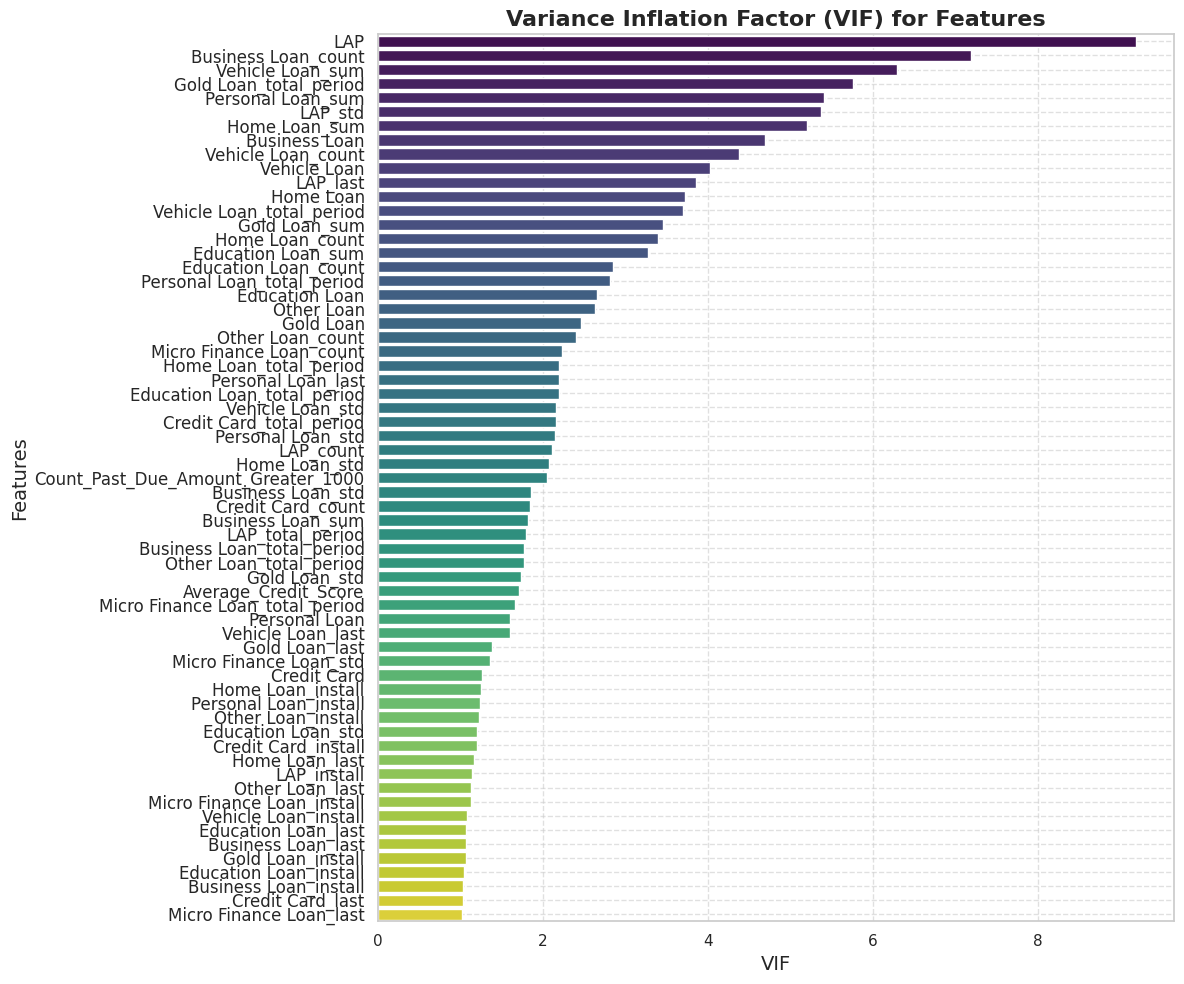

In [115]:
plt.figure(figsize=(12, 10)) 
sns.set(style="whitegrid")

vif_sorted = vif.sort_values(by='VIF', ascending=False)

sns.barplot(data=vif_sorted, x='VIF', y='Feature', palette='viridis')

plt.title('Variance Inflation Factor (VIF) for Features', fontsize=16, weight='bold')
plt.xlabel('VIF', fontsize=14)
plt.ylabel('Features', fontsize=14)

plt.yticks(fontsize=12, rotation=0, ha="right")

plt.grid(True, linestyle='--', alpha=0.6)

plt.subplots_adjust(left=0.2)  # Increase left margin to avoid label overlap

plt.tight_layout()

# Show the plot
plt.show()

In [116]:
merged_df.shape

(45654, 74)

In [117]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45444 entries, 0 to 45443
Data columns (total 75 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   ID                                  45444 non-null  int64  
 1   Business Loan_sum                   45444 non-null  float64
 2   Credit Card_sum                     45444 non-null  float64
 3   Education Loan_sum                  45444 non-null  float64
 4   Gold Loan_sum                       45444 non-null  float64
 5   Home Loan_sum                       45444 non-null  float64
 6   LAP_sum                             45444 non-null  float64
 7   Micro Finance Loan_sum              45444 non-null  float64
 8   Other Loan_sum                      45444 non-null  float64
 9   Personal Loan_sum                   45444 non-null  float64
 10  Vehicle Loan_sum                    45444 non-null  float64
 11  Business Loan_count                 45444

#### Checking Multicollinearity in the independent variables and dependent variable

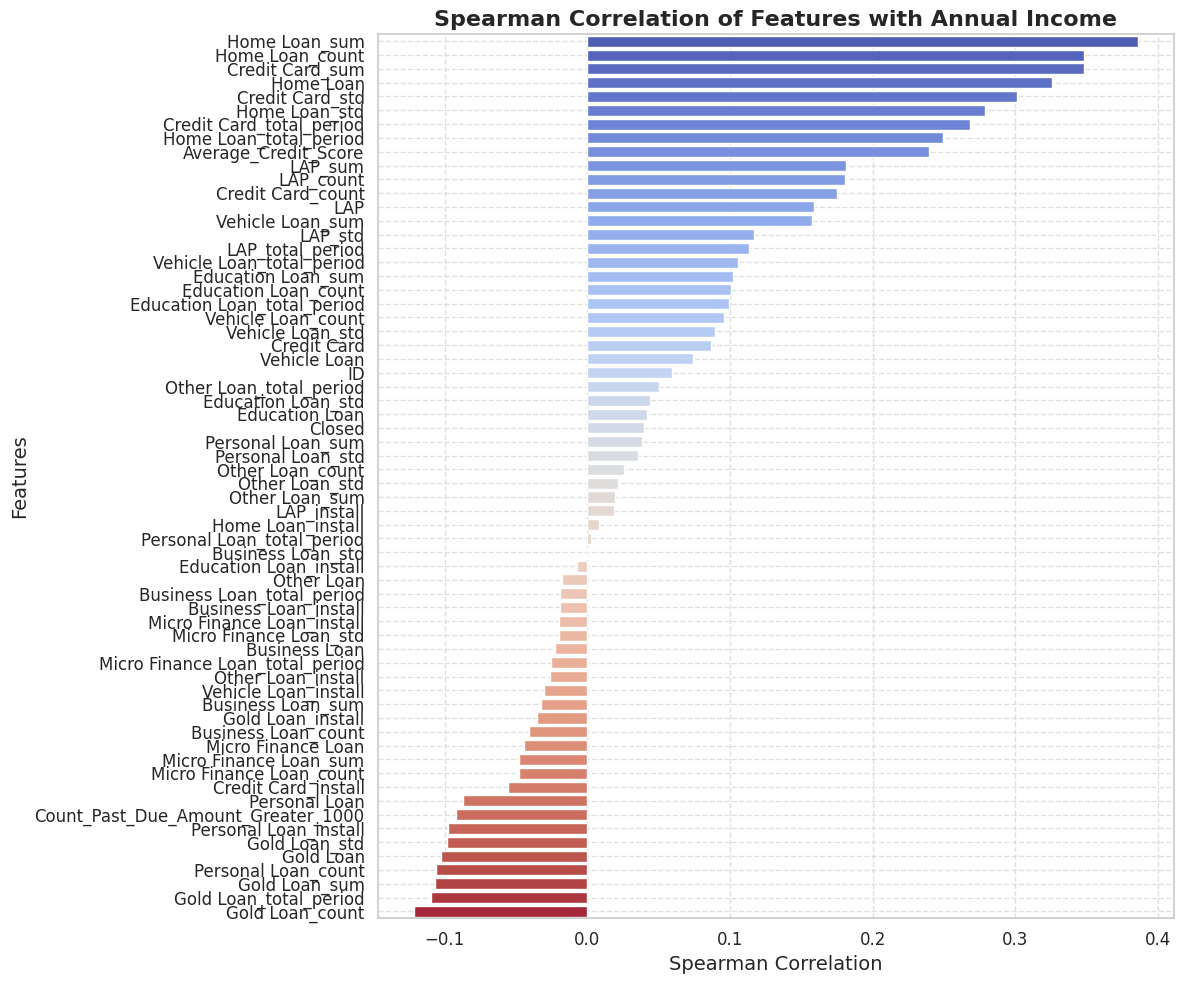

In [118]:
plt.figure(figsize=(12, 10))
sns.set(style="whitegrid")

sns.barplot(data=spearman_corr_df, x='Spearman_Correlation', y='Feature', palette='coolwarm')

plt.title('Spearman Correlation of Features with Annual Income', fontsize=16, weight='bold')
plt.xlabel('Spearman Correlation', fontsize=14)
plt.ylabel('Features', fontsize=14)

plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

plt.grid(True, linestyle='--', alpha=0.6)
plt.subplots_adjust(left=0.2)  # Increase left margin to avoid label overlap


plt.tight_layout()
plt.show()

In [119]:
spearman_corr_df.head(100)

,Feature,Spearman_Correlation
1,Home Loan_sum,0.385722
2,Home Loan_count,0.348058
3,Credit Card_sum,0.347913
4,Home Loan,0.325313
5,Credit Card_std,0.300760
...,...,...
60,Gold Loan,-0.102389
61,Personal Loan_count,-0.106067
62,Gold Loan_sum,-0.106534
63,Gold Loan_total_period,-0.109602


**Selection of features**

In [120]:
threshold = 0.1


selected_features_df = spearman_corr_df[spearman_corr_df['Spearman_Correlation'].abs() > threshold]


final_selected_features = selected_features_df[selected_features_df['Feature'].isin(vif_sorted_features)]


print("Final Selected Features:", final_selected_features['Feature'].tolist())


Final Selected Features: ['Home Loan_sum', 'Home Loan_count', 'Home Loan', 'Home Loan_std', 'Credit Card_total_period', 'Home Loan_total_period', 'Average_Credit_Score', 'LAP_count', 'Credit Card_count', 'LAP', 'Vehicle Loan_sum', 'LAP_std', 'LAP_total_period', 'Vehicle Loan_total_period', 'Education Loan_sum', 'Education Loan_count', 'Gold Loan', 'Gold Loan_sum', 'Gold Loan_total_period']


### Model Building

In [121]:
from sklearn.model_selection import train_test_split
X=X[final_selected_features['Feature'].tolist()]
y=data['Annual_Income']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [122]:
import optuna
import xgboost as xgb
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import numpy as np  

def objective(trial):
    param = {
        "objective": "reg:squarederror",
        "subsample": trial.suggest_categorical("subsample", [0.6, 0.7, 0.8, 0.9]),  # Reduced options
        "colsample_bytree": trial.suggest_categorical("colsample_bytree", [0.6, 0.7, 0.8, 0.9, 1.0]),  # Reduced options
        "learning_rate": trial.suggest_categorical("learning_rate", [0.01,0.03, 0.05,0.09, 0.12]),  # Categorical learning rates
        "n_estimators": trial.suggest_categorical("n_estimators", [100,200,300,400,500]),  # Narrow the number of estimators
        "max_depth": trial.suggest_categorical("max_depth", [3, 5,7,9]),  # Categorical depth choices
        "min_child_weight": trial.suggest_categorical("min_child_weight", [1, 3, 5]),  # Narrowed range for min_child_weight
        "gamma": trial.suggest_categorical("gamma", [0.1, 0.2, 0.5,0.7,1]),  # Categorical gamma values
    }

    model = xgb.XGBRegressor(**param, random_state=1)
    model.fit(X_train, y_train)
    preds = model.predict(X_test)
    mse = mean_squared_error(y_test, preds)
    rmse = np.sqrt(mse)  
    
    return rmse  


study = optuna.create_study(direction="minimize")
study.optimize(objective, n_trials=30)


print("Best trial:")
trial = study.best_trial
print(f"  Value: {trial.value}")
print("  Params: ")
for key, value in trial.params.items():
    print(f"    {key}: {value}")


best_params = study.best_params
final_model = xgb.XGBRegressor(**best_params, objective="reg:squarederror", random_state=42)
final_model.fit(X_train, y_train)


y_pred = final_model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)  
print(f"Root Mean Squared Error: {rmse}")


feature_importances = final_model.feature_importances_


importance_df = pd.DataFrame({
    "Feature": X_train.columns,
    "Importance": feature_importances
}).sort_values(by="Importance", ascending=False)

# Display the DataFrame
print(importance_df)


[I 2024-10-12 23:07:30,436] A new study created in memory with name: no-name-4de48603-1252-4671-acaa-d21d04c47e16
[I 2024-10-12 23:07:31,121] Trial 0 finished with value: 2121668.9512338527 and parameters: {'subsample': 0.7, 'colsample_bytree': 0.9, 'learning_rate': 0.12, 'n_estimators': 200, 'max_depth': 5, 'min_child_weight': 1, 'gamma': 0.2}. Best is trial 0 with value: 2121668.9512338527.
[I 2024-10-12 23:07:32,129] Trial 1 finished with value: 1948171.1905758486 and parameters: {'subsample': 0.6, 'colsample_bytree': 0.7, 'learning_rate': 0.01, 'n_estimators': 500, 'max_depth': 3, 'min_child_weight': 5, 'gamma': 0.1}. Best is trial 1 with value: 1948171.1905758486.
[I 2024-10-12 23:07:33,064] Trial 2 finished with value: 1999760.8030809134 and parameters: {'subsample': 0.9, 'colsample_bytree': 0.6, 'learning_rate': 0.03, 'n_estimators': 500, 'max_depth': 3, 'min_child_weight': 5, 'gamma': 0.5}. Best is trial 1 with value: 1948171.1905758486.
[I 2024-10-12 23:07:35,506] Trial 3 fini

Best trial:
  Value: 1944622.3472983835
  Params: 
    subsample: 0.8
    colsample_bytree: 0.7
    learning_rate: 0.01
    n_estimators: 100
    max_depth: 9
    min_child_weight: 3
    gamma: 0.1
Root Mean Squared Error: 1943466.412560905
                      Feature  Importance
3               Home Loan_std    0.151268
7                   LAP_count    0.141712
0               Home Loan_sum    0.112475
2                   Home Loan    0.079278
11                    LAP_std    0.073091
8           Credit Card_count    0.062257
10           Vehicle Loan_sum    0.057451
5      Home Loan_total_period    0.041989
13  Vehicle Loan_total_period    0.039993
4    Credit Card_total_period    0.039182
1             Home Loan_count    0.039025
9                         LAP    0.032373
12           LAP_total_period    0.030803
6        Average_Credit_Score    0.024904
17              Gold Loan_sum    0.021242
14         Education Loan_sum    0.014854
16                  Gold Loan    0.014420
18 

In [123]:
spearman_corr = X.corr(method='spearman')


corr_pairs = []


for i in range(len(spearman_corr.columns)):
    for j in range(i + 1, len(spearman_corr.columns)):  
        x1 = spearman_corr.columns[i]
        x2 = spearman_corr.columns[j]
        corr_value = abs(spearman_corr.iloc[i, j])  
        corr_pairs.append((x1, x2, corr_value))

# Convert the list to a DataFrame
corr_df = pd.DataFrame(corr_pairs, columns=['X1', 'X2', 'Abs_Correlation'])


corr_df = corr_df.sort_values(by='Abs_Correlation', ascending=False)
print(corr_df)

                           X1                         X2  Abs_Correlation
161        Education Loan_sum       Education Loan_count         0.996213
0               Home Loan_sum            Home Loan_count         0.970330
170             Gold Loan_sum     Gold Loan_total_period         0.930612
1               Home Loan_sum                  Home Loan         0.914438
106                 LAP_count                        LAP         0.891276
..                        ...                        ...              ...
75   Credit Card_total_period         Education Loan_sum         0.002207
76   Credit Card_total_period       Education Loan_count         0.001903
62              Home Loan_std       Education Loan_count         0.000956
99       Average_Credit_Score  Vehicle Loan_total_period         0.000599
61              Home Loan_std         Education Loan_sum         0.000383

[171 rows x 3 columns]


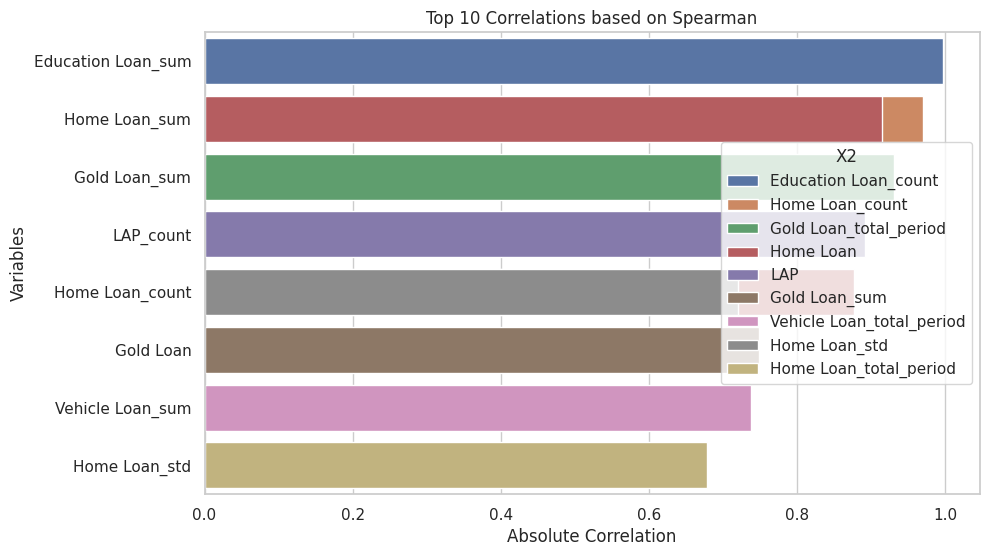

In [124]:
# Bar plot of top correlations
top_corr = corr_df.head(10)  # Display top 10 correlations

plt.figure(figsize=(10, 6))
sns.barplot(data=top_corr, x='Abs_Correlation', y='X1', hue='X2', dodge=False)
plt.title('Top 10 Correlations based on Spearman')
plt.xlabel('Absolute Correlation')
plt.ylabel('Variables')
plt.show()

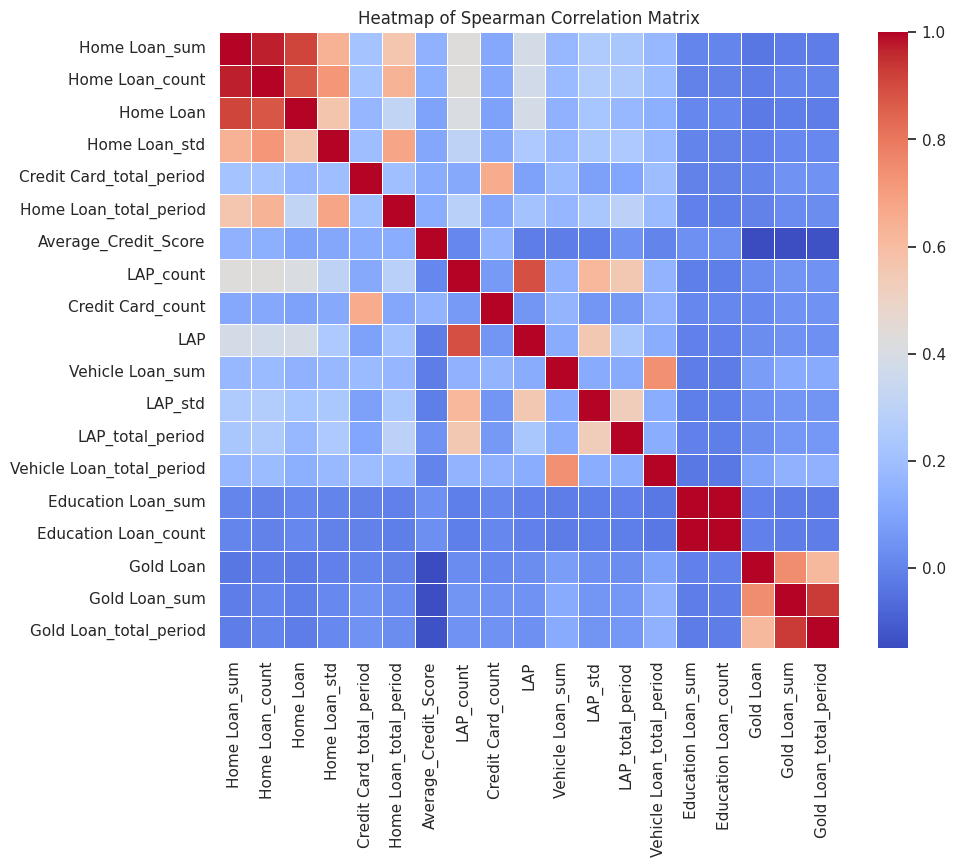

In [125]:
plt.figure(figsize=(10, 8))
sns.heatmap(spearman_corr, cmap='coolwarm', linewidths=0.5, fmt='.2f')
plt.title('Heatmap of Spearman Correlation Matrix')
plt.show()


In [126]:
corr_threshold = 0.80

selected_features = set(importance_df['Feature'])

def get_importance(feature):
    if feature in importance_df['Feature'].values:
        return importance_df.loc[importance_df['Feature'] == feature, 'Importance'].values[0]
    else:
        return None  


for index, row in corr_df.iterrows():
    feature_1 = row['X1']
    feature_2 = row['X2']
    abs_corr = row['Abs_Correlation']


    if abs_corr > corr_threshold:
        importance_1 = get_importance(feature_1)
        importance_2 = get_importance(feature_2)

        # Ensure that both features exist in the importance dataframe
        if importance_1 is not None and importance_2 is not None:
            # Keep the feature with higher importance, remove the other
            if importance_1 >= importance_2:
                selected_features.discard(feature_2)
            else:
                selected_features.discard(feature_1)

# Convert the final set of selected features into a sorted list
final_selected_features = sorted(list(selected_features))


print("Final selected features:", final_selected_features)


Final selected features: ['Average_Credit_Score', 'Credit Card_count', 'Credit Card_total_period', 'Education Loan_sum', 'Gold Loan', 'Gold Loan_sum', 'Home Loan_std', 'Home Loan_sum', 'Home Loan_total_period', 'LAP_count', 'LAP_std', 'LAP_total_period', 'Vehicle Loan_sum', 'Vehicle Loan_total_period']


In [127]:
len(final_selected_features)
X2=X[final_selected_features]

In [128]:
X2.shape

(45444, 14)

In [129]:
X2=pd.merge(X2,data[['ID',"Annual_Income"]], left_index=True,right_index=True)
demo_data['Gender'] = demo_data['Gender'].str.upper()
X2=pd.merge(X2,demo_data[['ID','Gender','Occupation','City_Rank']], on='ID')

In [130]:
X2['Occupation'] = X2['Occupation'].astype('object')
X2['Target_binary'] = np.where(X2['Annual_Income'] < 800000,0,1)
cat_x = X2.select_dtypes(include=['object'])
X_train, X_test, y_train, y_test = train_test_split(X2, y, test_size=0.2, random_state=42)

In [131]:
!pip install woe_conversion
from woe_conversion.woe import *


woemodel = WoeConversion(binarytarget='Target_binary', features=cat_x.columns.tolist())

woemodel.fit(X_train)
X_train = woemodel.transform(X_train)
X_test = woemodel.transform(X_test)

In [132]:
X_train=X_train.drop(columns=['ID','Annual_Income','Target_binary'])
X_test=X_test.drop(columns=['ID','Annual_Income','Target_binary'])

 

In [133]:
import optuna
import xgboost as xgb
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import numpy as np  

def objective(trial):
    param = {
        "objective": "reg:squarederror",
        "subsample": trial.suggest_categorical("subsample", [0.6, 0.7, 0.8, 0.9]),  # Reduced options
        "colsample_bytree": trial.suggest_categorical("colsample_bytree", [0.6, 0.7, 0.8, 0.9, 1.0]),  # Reduced options
        "learning_rate": trial.suggest_categorical("learning_rate", [0.01,0.03, 0.05,0.09, 0.12]),  # Categorical learning rates
        "n_estimators": trial.suggest_categorical("n_estimators", [100,200,300,400,500]),  # Narrow the number of estimators
        "max_depth": trial.suggest_categorical("max_depth", [3, 5,7,9]),  # Categorical depth choices
        "min_child_weight": trial.suggest_categorical("min_child_weight", [1, 3, 5]),  # Narrowed range for min_child_weight
        "gamma": trial.suggest_categorical("gamma", [0.1, 0.2, 0.5,0.7,1]),  # Categorical gamma values
        "alpha": trial.suggest_categorical("alpha", [0, 0.01, 0.1, 1, 10]),  # L1 regularization term on weights
        "lambda": trial.suggest_categorical("lambda", [0, 0.01, 0.1, 1, 10])  # L2 regularization term on weights
    }

    model = xgb.XGBRegressor(**param, random_state=1)
    model.fit(X_train, y_train)
    preds = model.predict(X_test)
    mse = mean_squared_error(y_test, preds)
    rmse = np.sqrt(mse)  
    
    return rmse  


study = optuna.create_study(direction="minimize")
study.optimize(objective, n_trials=30)


print("Best trial:")
trial = study.best_trial
print(f"  Value: {trial.value}")
print("  Params: ")
for key, value in trial.params.items():
    print(f"    {key}: {value}")


best_params = study.best_params
final_model = xgb.XGBRegressor(**best_params, objective="reg:squarederror", random_state=42)
final_model.fit(X_train, y_train)


y_pred = final_model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)  
print(f"Root Mean Squared Error: {rmse}")


feature_importances = final_model.feature_importances_


importance_df = pd.DataFrame({
    "Feature": X_train.columns,
    "Importance": feature_importances
}).sort_values(by="Importance", ascending=False)

# Display the DataFrame
print(importance_df)


[I 2024-10-12 23:08:27,582] A new study created in memory with name: no-name-7702e2ee-cdac-4d41-a9f2-480dcc38f28e
[I 2024-10-12 23:08:29,160] Trial 0 finished with value: 1942177.2386169524 and parameters: {'subsample': 0.7, 'colsample_bytree': 0.9, 'learning_rate': 0.01, 'n_estimators': 200, 'max_depth': 9, 'min_child_weight': 5, 'gamma': 0.5, 'alpha': 0.1, 'lambda': 0}. Best is trial 0 with value: 1942177.2386169524.
[I 2024-10-12 23:08:29,946] Trial 1 finished with value: 1985067.5514261224 and parameters: {'subsample': 0.9, 'colsample_bytree': 0.7, 'learning_rate': 0.03, 'n_estimators': 300, 'max_depth': 5, 'min_child_weight': 3, 'gamma': 0.2, 'alpha': 0.01, 'lambda': 1}. Best is trial 0 with value: 1942177.2386169524.
[I 2024-10-12 23:08:30,729] Trial 2 finished with value: 1922934.866688887 and parameters: {'subsample': 0.8, 'colsample_bytree': 0.7, 'learning_rate': 0.05, 'n_estimators': 100, 'max_depth': 9, 'min_child_weight': 3, 'gamma': 0.1, 'alpha': 1, 'lambda': 10}. Best is 

Best trial:
  Value: 1904693.8816082003
  Params: 
    subsample: 0.7
    colsample_bytree: 0.6
    learning_rate: 0.01
    n_estimators: 300
    max_depth: 7
    min_child_weight: 1
    gamma: 0.2
    alpha: 10
    lambda: 10
Root Mean Squared Error: 1904573.174338962
                      Feature  Importance
16                  City_Rank    0.138800
7               Home Loan_sum    0.131131
6               Home Loan_std    0.124942
9                   LAP_count    0.099473
8      Home Loan_total_period    0.083780
12           Vehicle Loan_sum    0.066412
10                    LAP_std    0.053627
1           Credit Card_count    0.051113
13  Vehicle Loan_total_period    0.042690
2    Credit Card_total_period    0.036767
11           LAP_total_period    0.032767
15                 Occupation    0.030912
0        Average_Credit_Score    0.030001
14                     Gender    0.021380
5               Gold Loan_sum    0.020102
3          Education Loan_sum    0.019737
4               

In [134]:

feature_importances = final_model.feature_importances_

importance_df = pd.DataFrame({
    "Feature": X_train.columns,
    "Importance": feature_importances
}).sort_values(by="Importance", ascending=False)

importance_df




,Feature,Importance
16,City_Rank,0.138800
7,Home Loan_sum,0.131131
6,Home Loan_std,0.124942
9,LAP_count,0.099473
8,Home Loan_total_period,0.083780
12,Vehicle Loan_sum,0.066412
10,LAP_std,0.053627
1,Credit Card_count,0.051113
13,Vehicle Loan_total_period,0.042690
2,Credit Card_total_period,0.036767
